# Libraries

In [130]:
# ================================================
# 📦 Standard Libraries
# ================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# ================================================
# ⚙️ Preprocessing & Pipelines
# ================================================
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ================================================
# 🧪 Sampling Techniques
# ================================================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours 

# ================================================
# 🤖 Models
# ================================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# ================================================
# 📊 Model Evaluation
# ================================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


In [131]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA 

In [132]:
CatCols = df.select_dtypes(include=['object', 'category']).columns
NumCols = df.select_dtypes(include=['number']).columns

## Explore Categorical Features

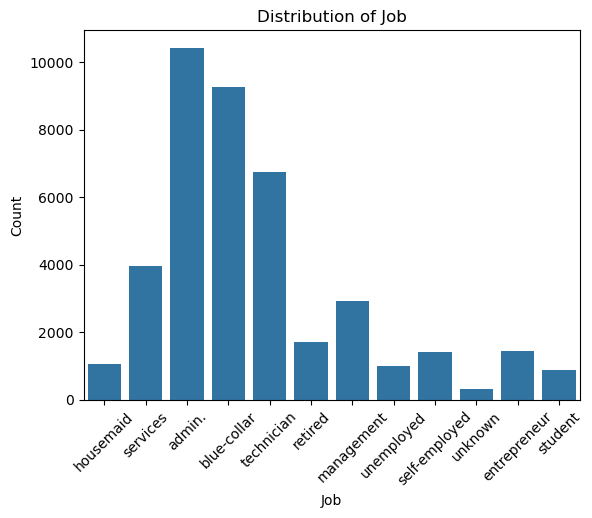

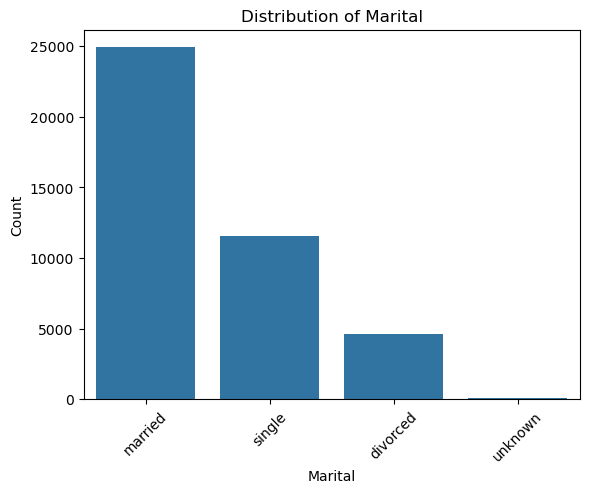

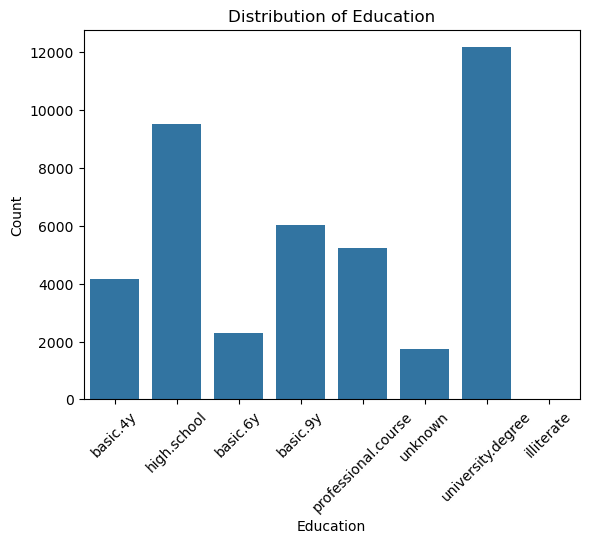

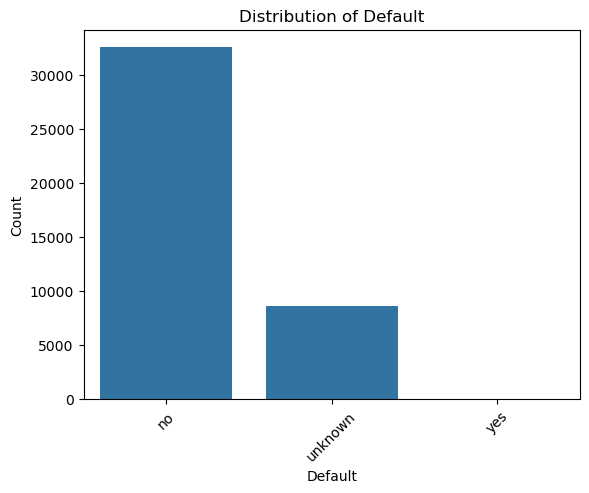

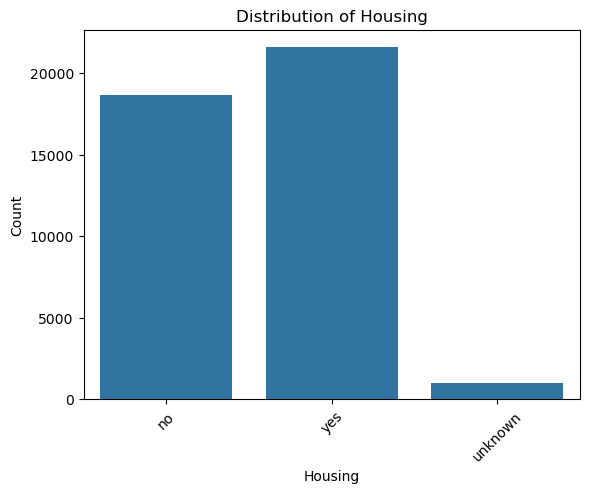

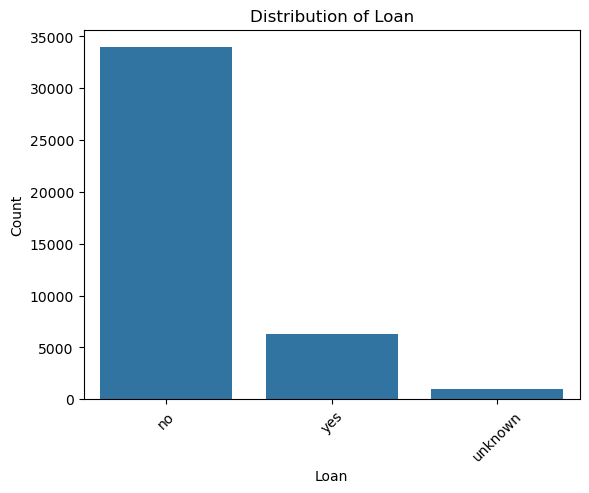

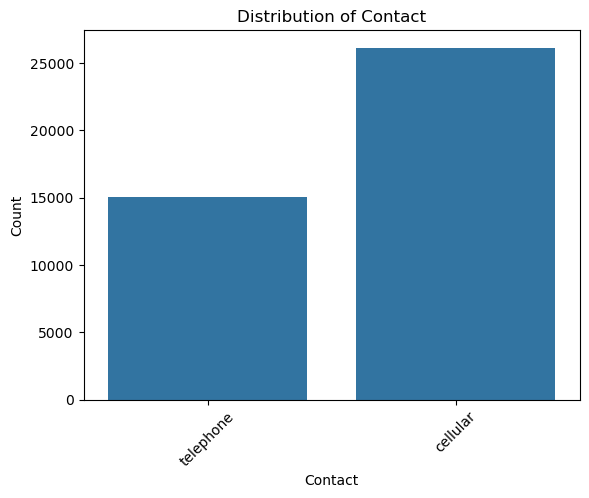

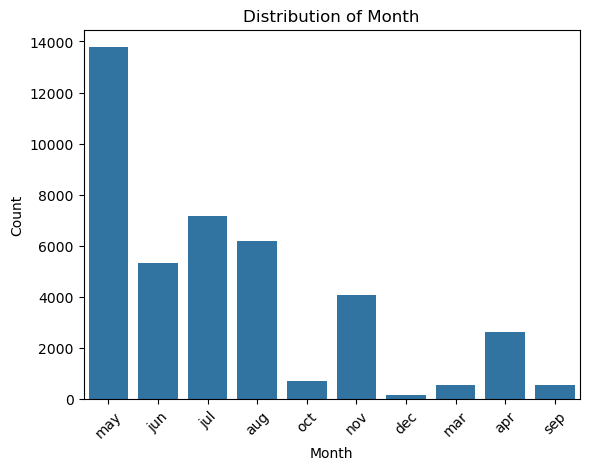

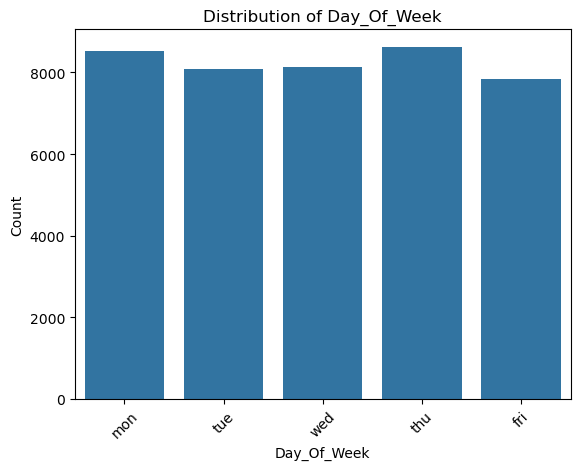

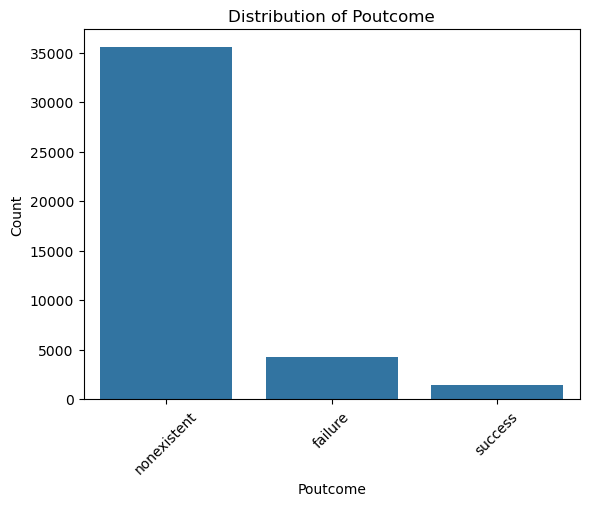

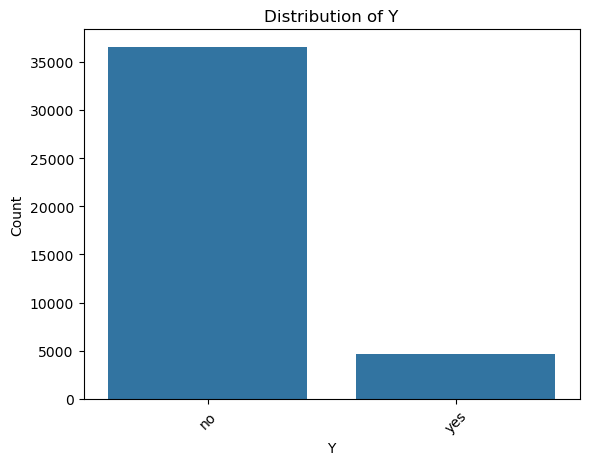

In [133]:
for col in CatCols:
    figsize=(12,6)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

## Explore Numerical Features

In [134]:
df[NumCols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


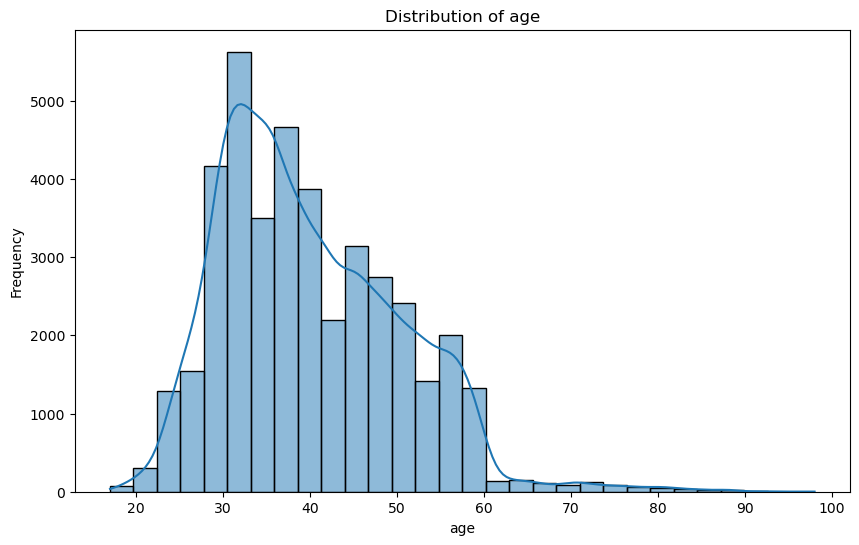

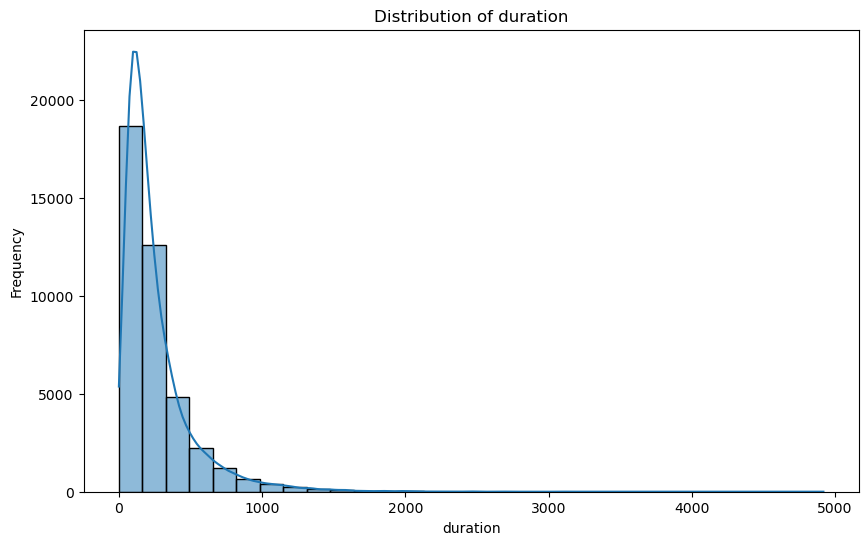

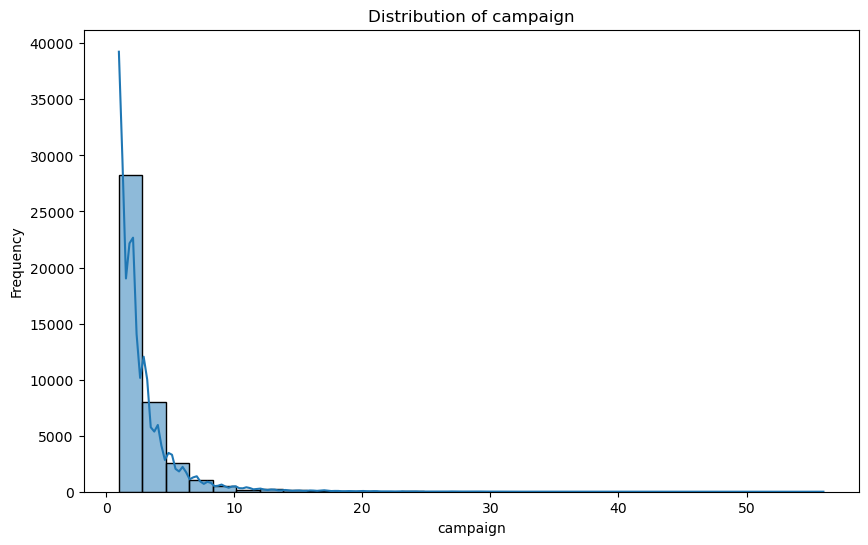

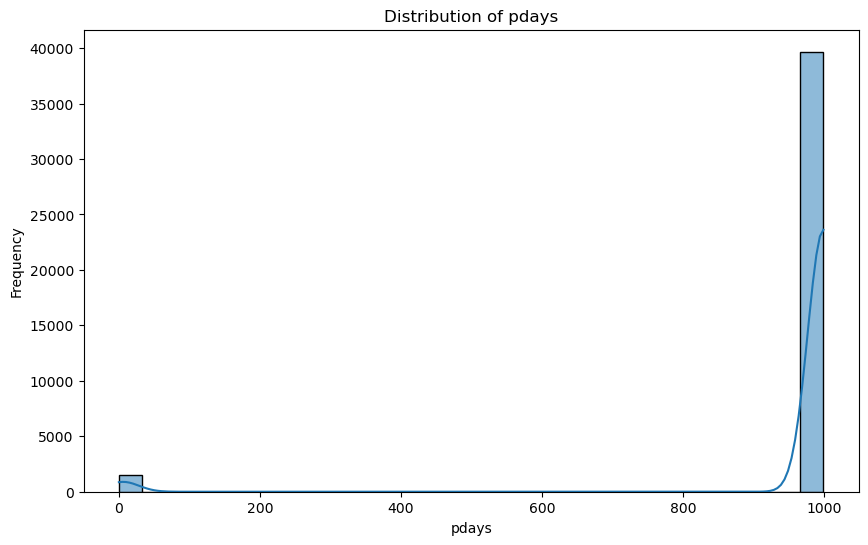

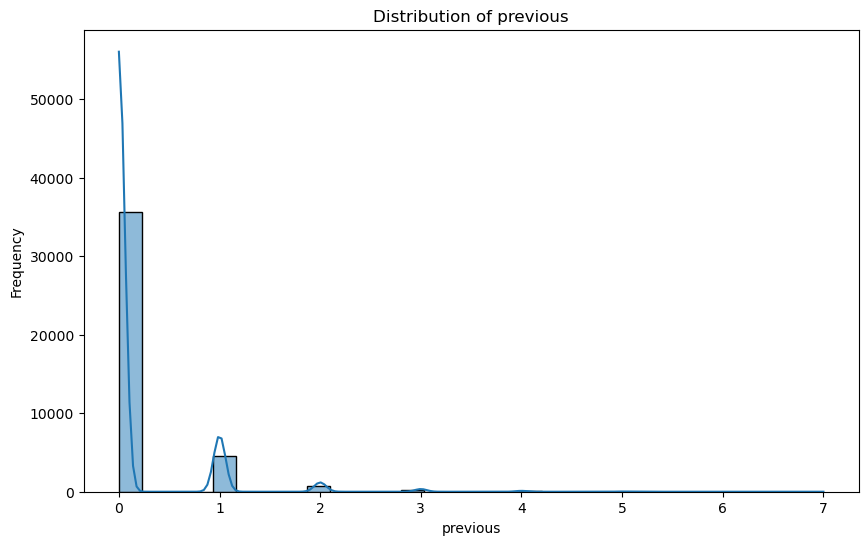

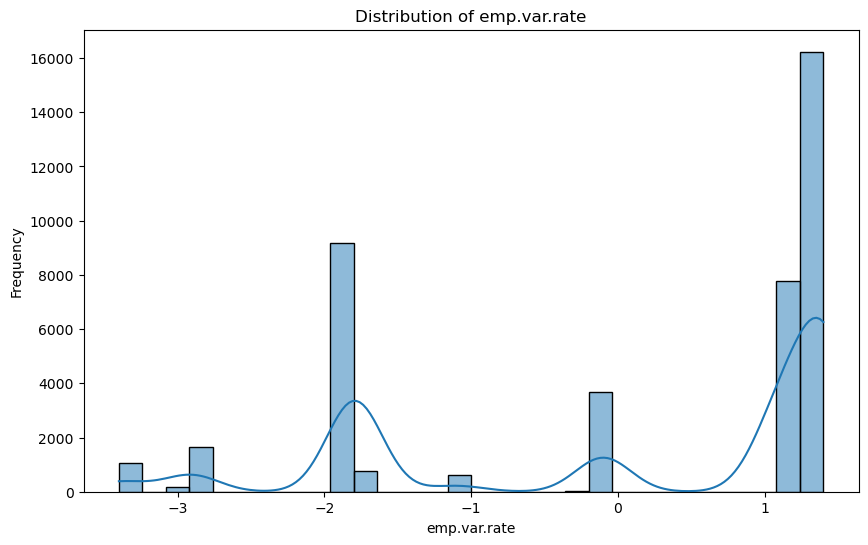

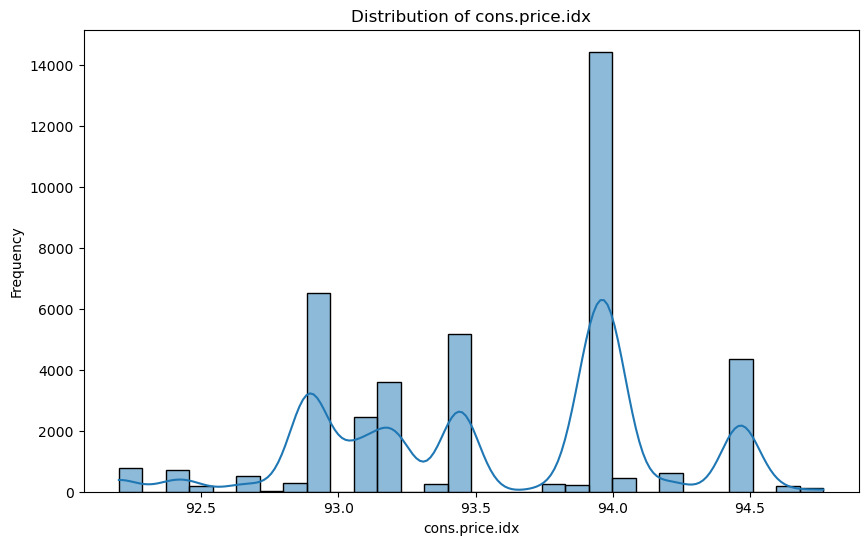

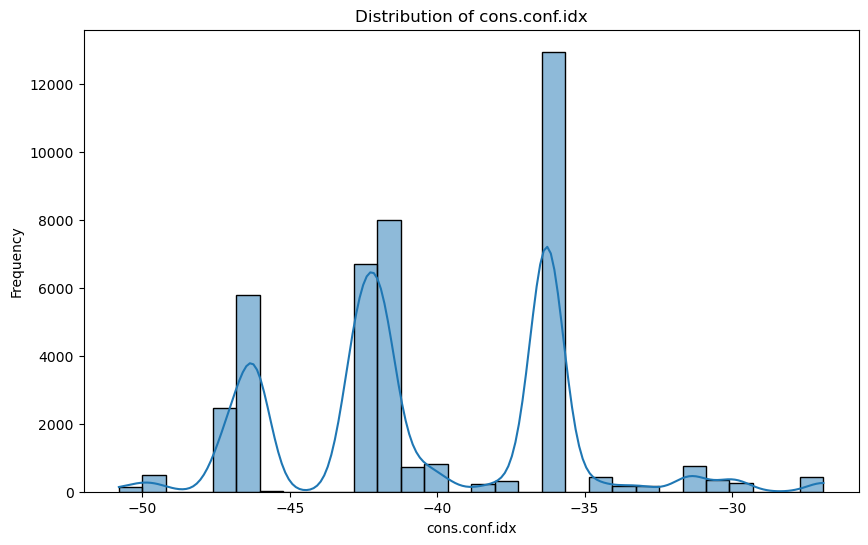

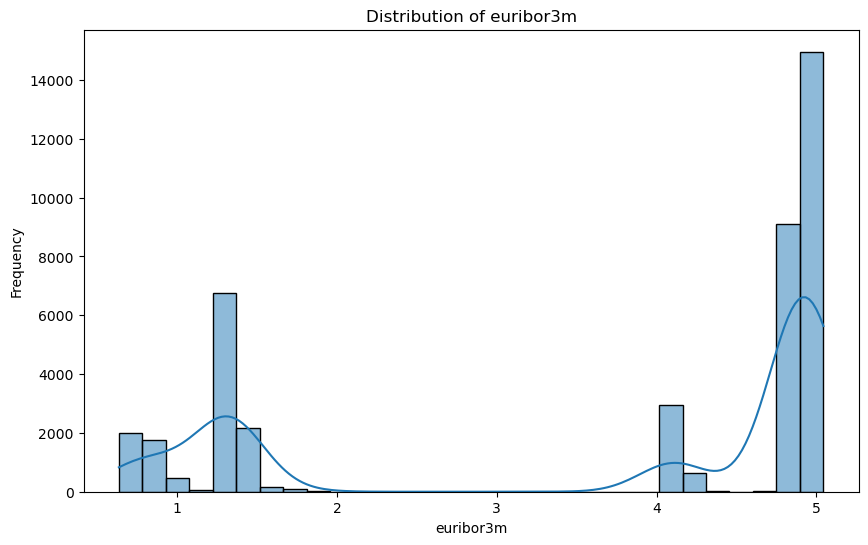

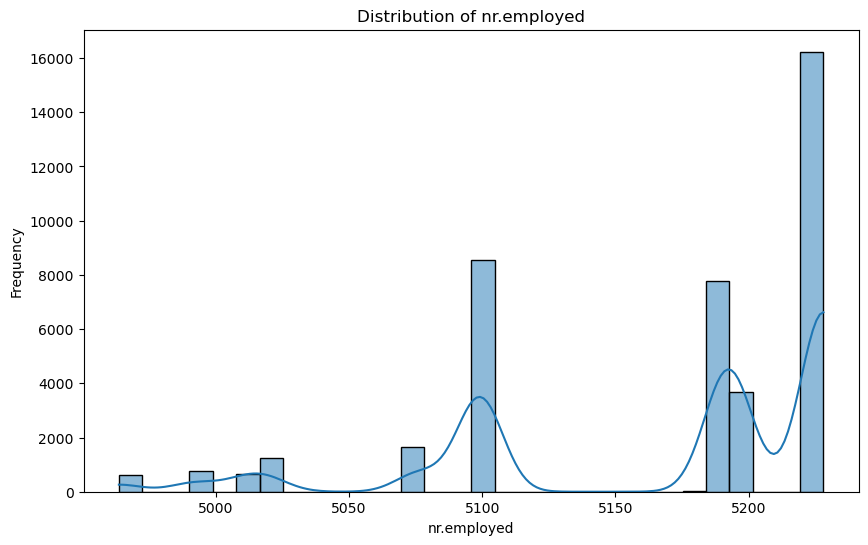

In [135]:
# Plot Distribution of Numerical Columns
for col in NumCols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Comparison with target variable

### Comparison using Numerical

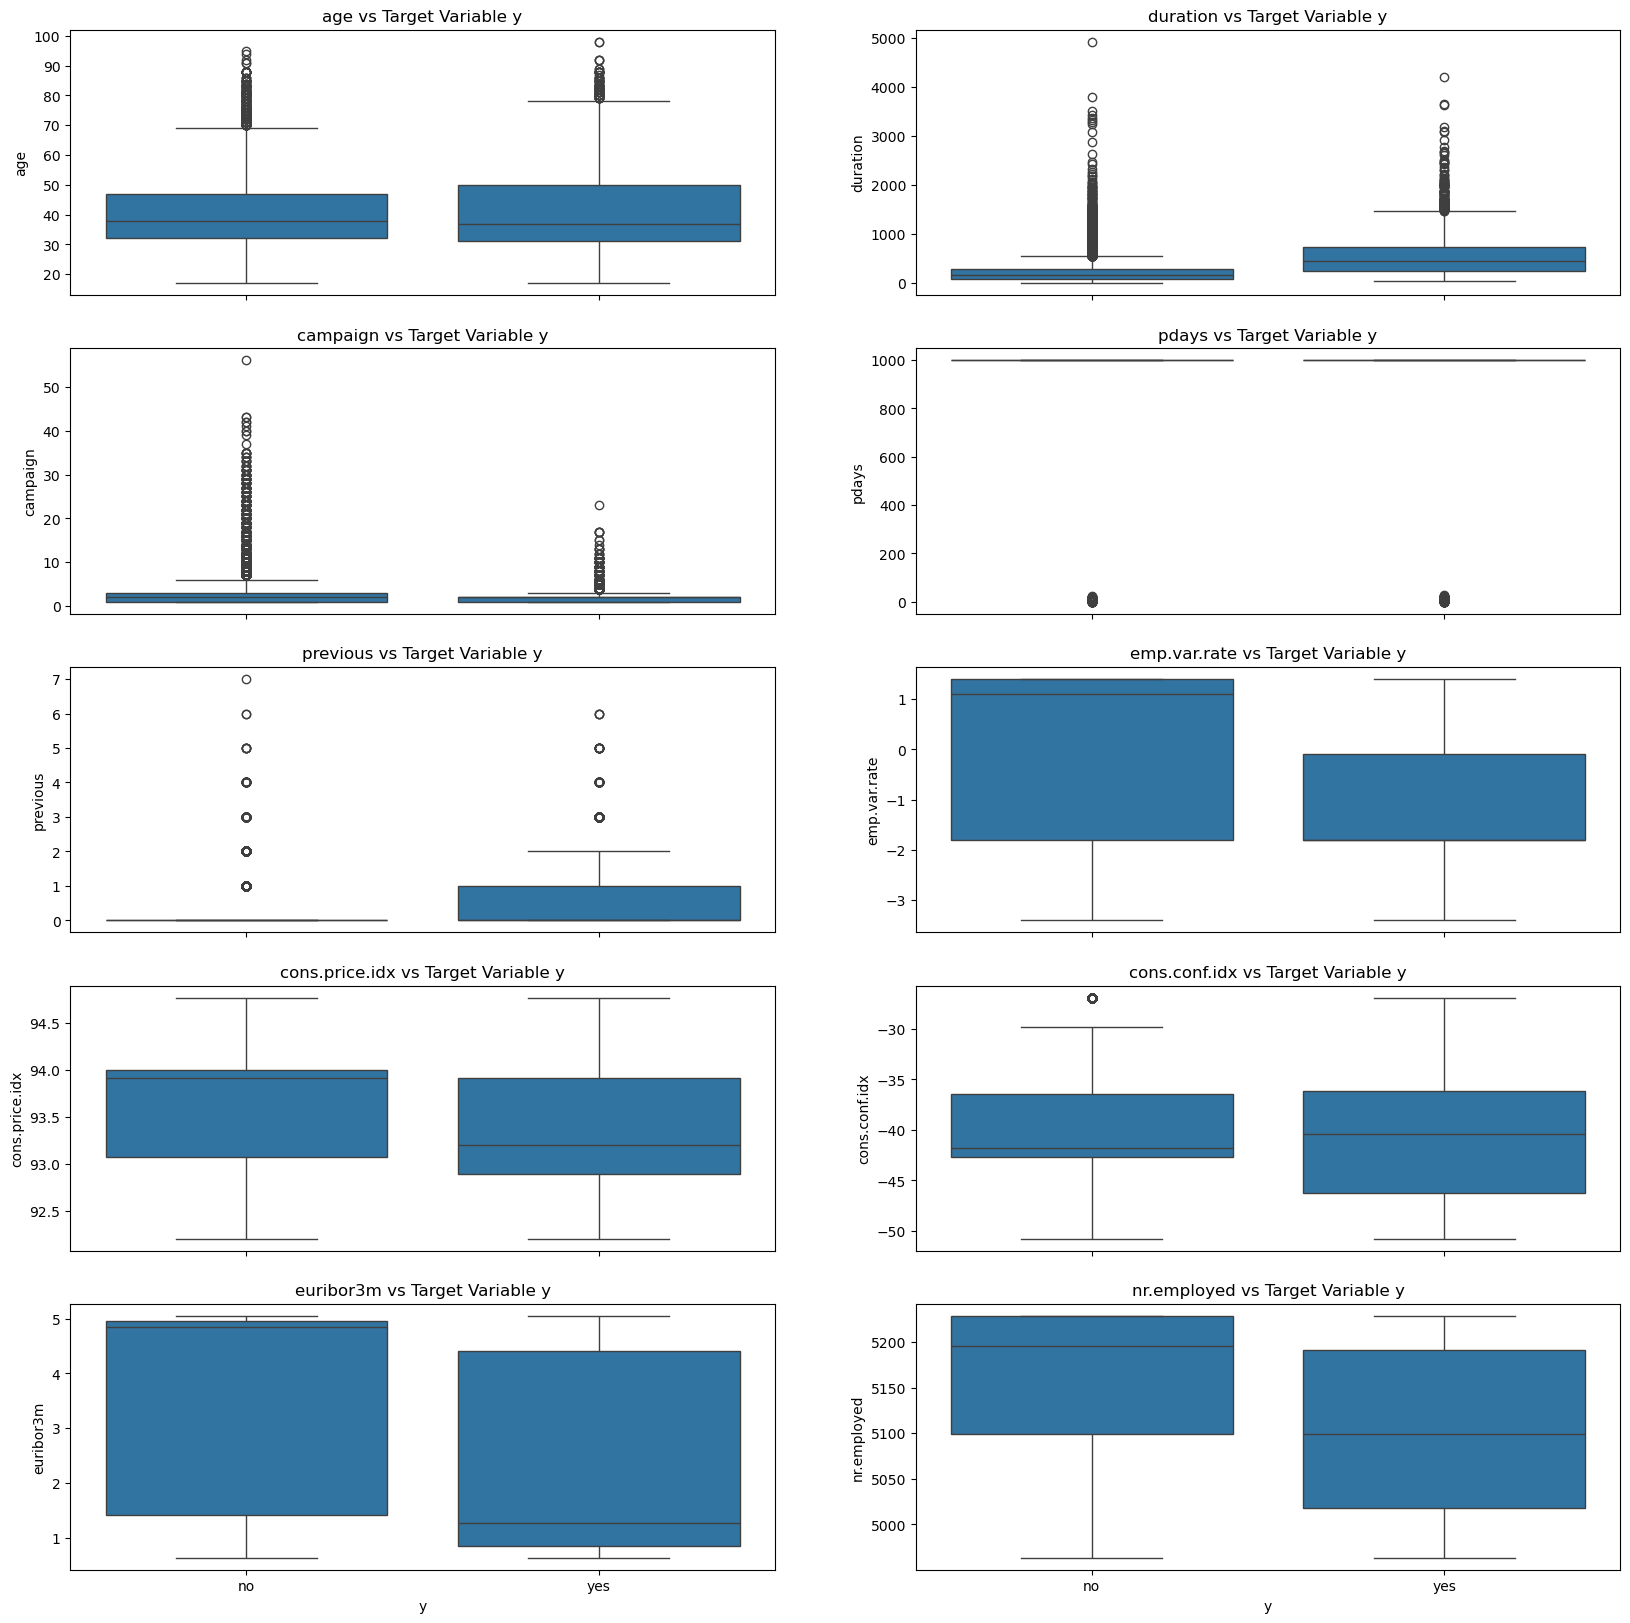

In [136]:
# Plot Numerical Columns against Target Variable y
fig, ax = plt.subplots(figsize=(20, 20), ncols=2, nrows=len(NumCols)//2, sharex=True)
for i, col in enumerate(NumCols):
    sns.boxplot(x='y', y=col, data=df, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'{col} vs Target Variable y')
    # ax[i // 2, i % 2].set_xlabel('Target Variable y')
    ax[i // 2, i % 2].set_ylabel(col)

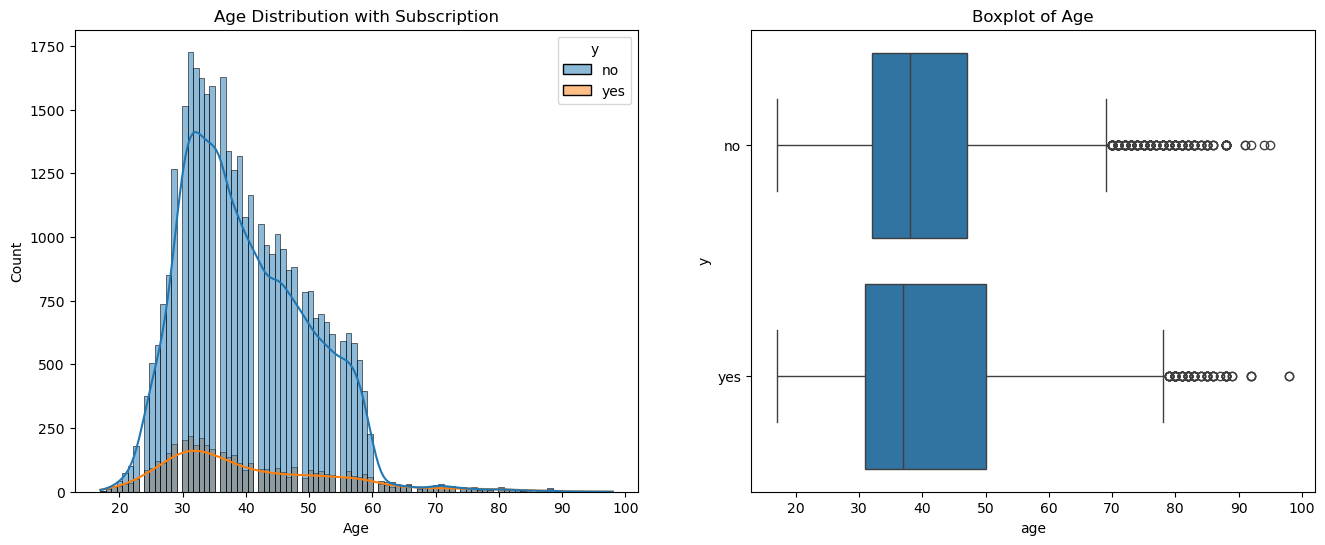

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='age', hue='y', kde=True, ax= axes[0])
axes[0].set_title('Age Distribution with Subscription')
axes[0].set_xlabel('Age')

sns.boxplot(data= df, x='age', y='y', ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()

### Comparison using Categorical

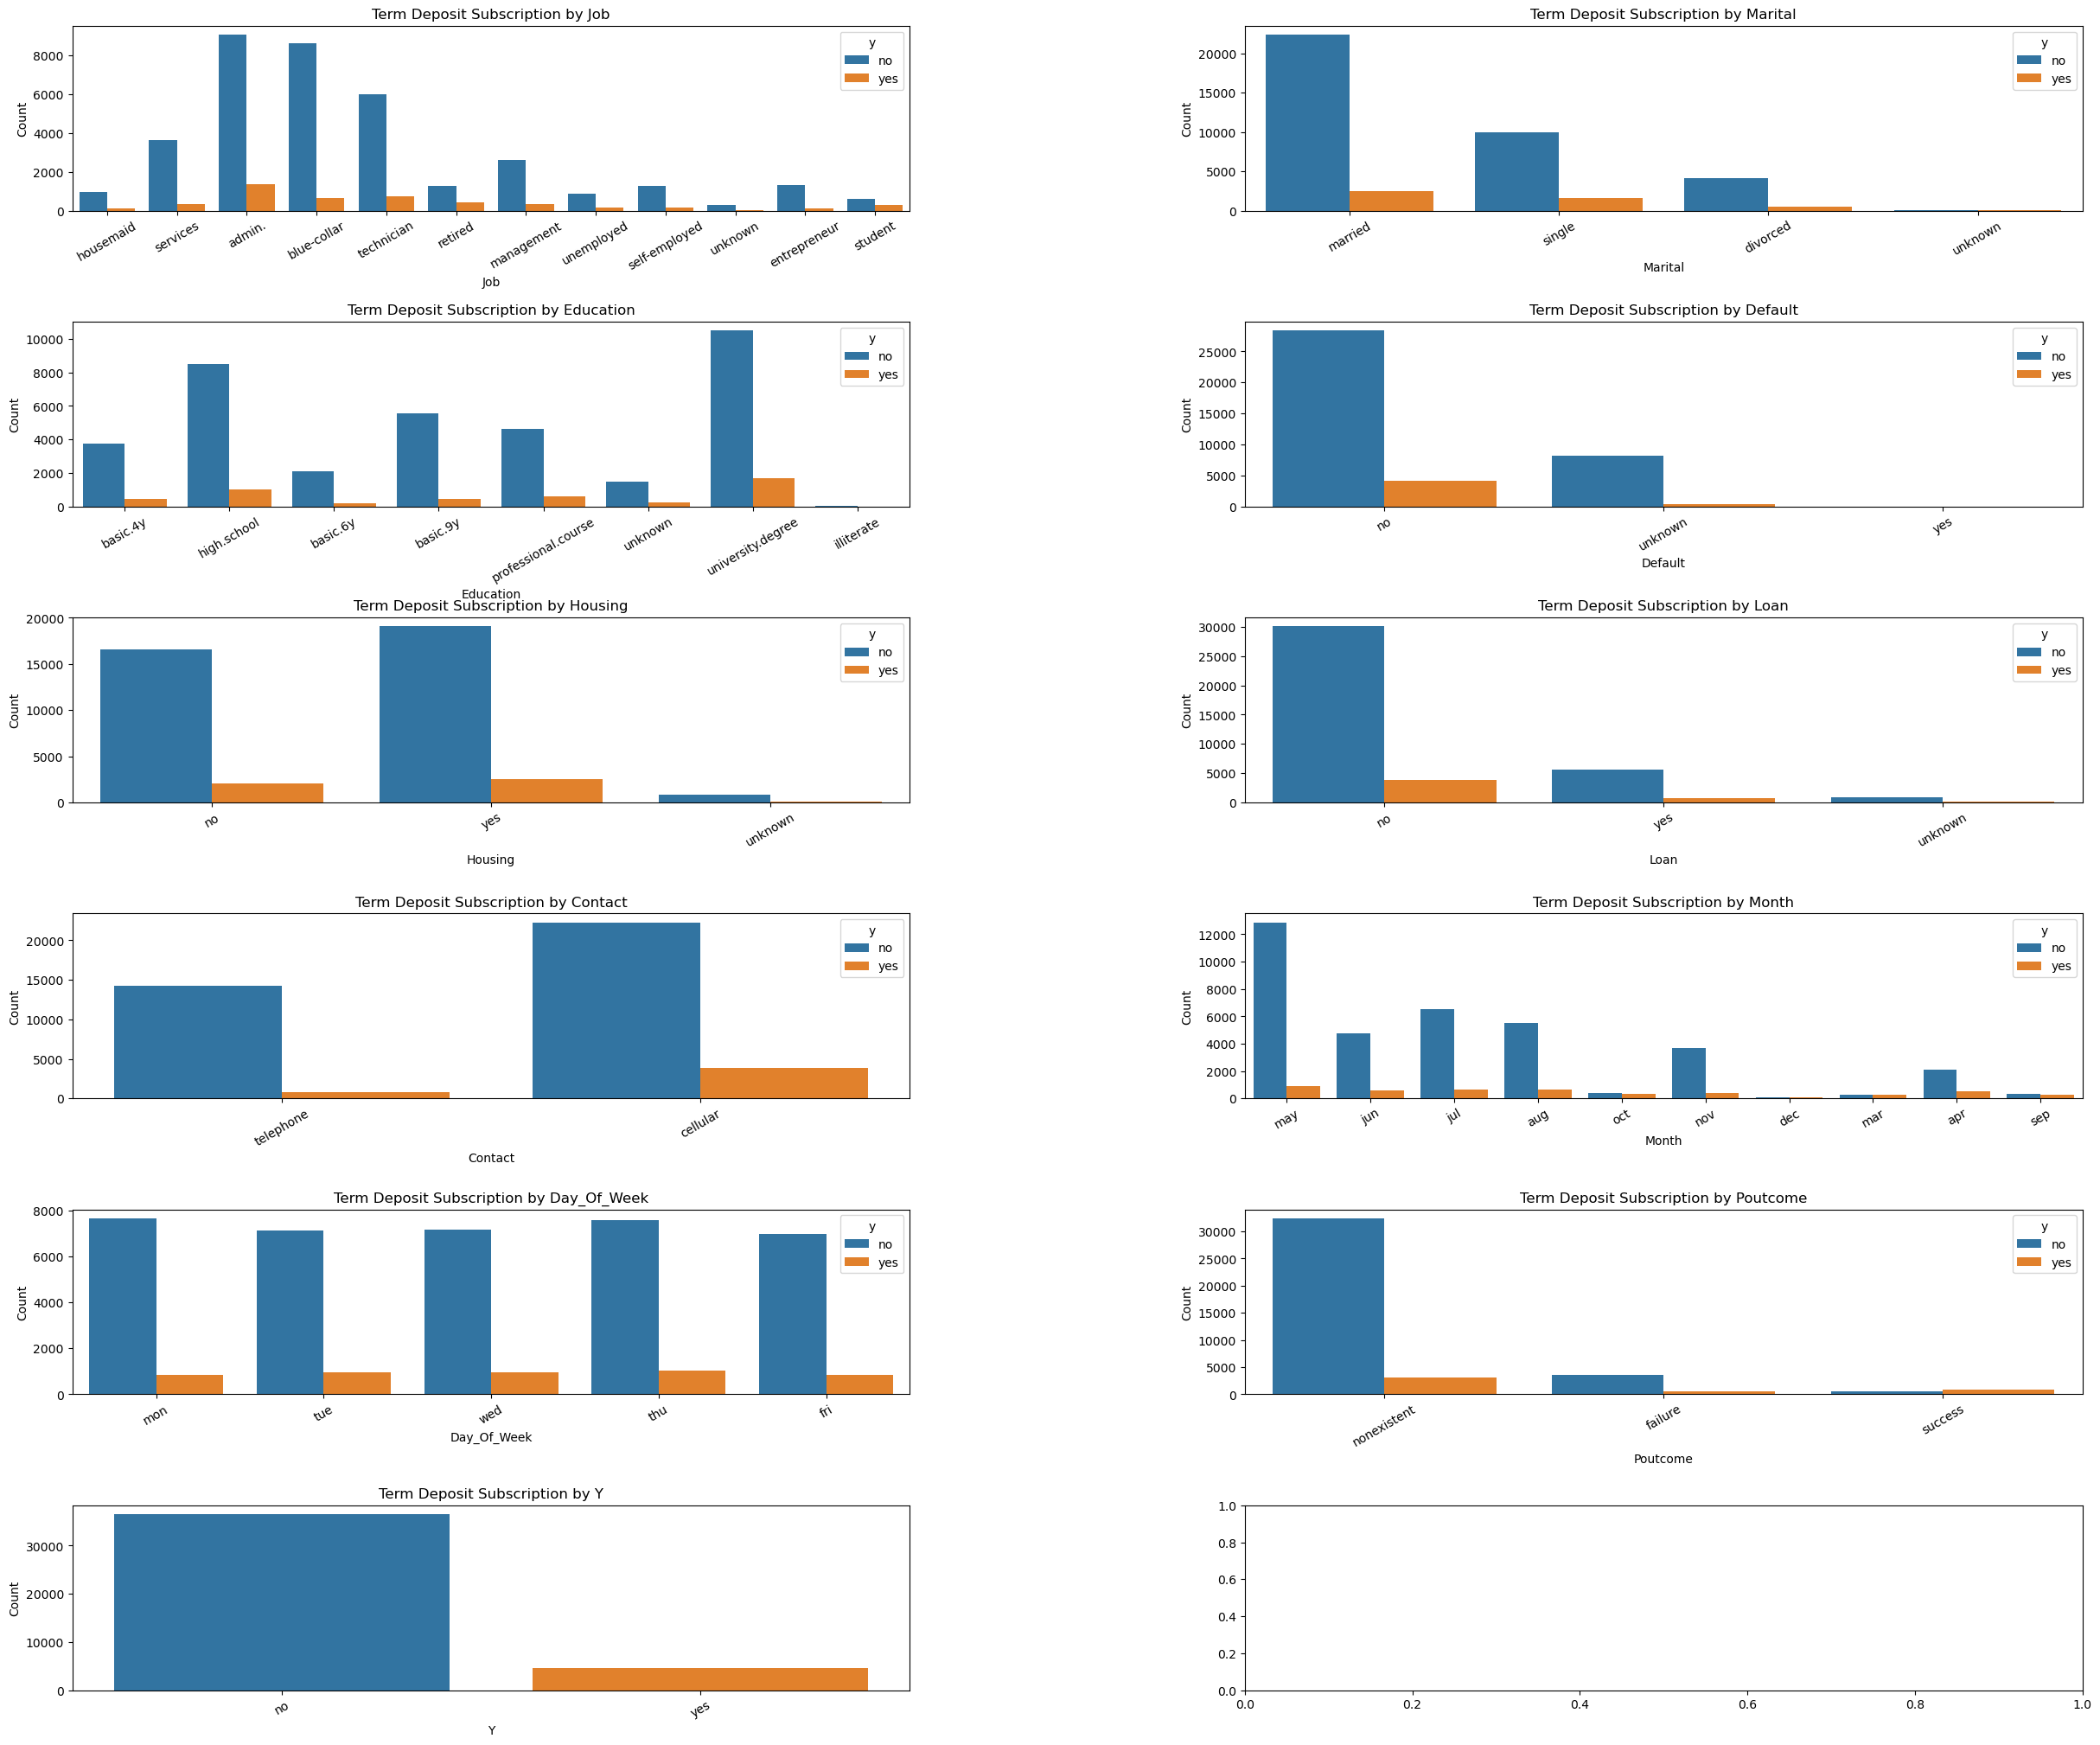

In [138]:
fig, ax= plt.subplots(figsize=(30,25), ncols=2, nrows=len(CatCols)//2+1)
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Manually adjust gaps


for i, col in enumerate(CatCols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i//2, i % 2])
    ax[i//2, i % 2].set_title(f'Term Deposit Subscription by {col.title()}')
    ax[i//2, i % 2].set_xlabel(col.title())
    ax[i//2, i % 2].set_ylabel('Count')
    ax[i//2, i % 2].tick_params(axis='x', rotation=30)

# Data Engineering

## Explore and manage missing values

In [141]:
X_clean = df.drop(columns=['y'])
y_clean = df['y'].replace({'yes': 1, 'no': 0})

In [142]:
NumCols = X_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
CatCols = X_clean.select_dtypes(include=['object']).columns.tolist()

## Train Test Split

In [143]:
# Split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, stratify=y_clean, test_size=0.2, random_state=42
)


## Data Preprocessing

In [144]:
# Identify categorical columns (indices)
categorical_features = X_clean.select_dtypes(include=['object', 'category']).columns
categorical_indices = [X_clean.columns.get_loc(col) for col in categorical_features]

In [145]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), NumCols),  # Numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), CatCols)  # Categorical columns
], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [146]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Index: 32950 entries, 25611 to 10747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       32950 non-null  int64
dtypes: int64(1)
memory usage: 514.8 KB


### Sampling Method 1 - Random Undersampler

In [147]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply under-sampling on processed numeric + one-hot encoded data
X_train_rus, y_train_rus = rus.fit_resample(X_train_processed, y_train)

print("Before Random Undersampling class distribution:", np.bincount(y_train))
print("After Random Undersampling class distribution:", np.bincount(y_train_rus))

Before Random Undersampling class distribution: [29238  3712]
After Random Undersampling class distribution: [3712 3712]


### Sampling Method 2 - Tomek Links

In [148]:
# Initialize Tomek Links
tl = TomekLinks(sampling_strategy='auto')

# Apply Tomek Links on processed training data
X_train_tl, y_train_tl = tl.fit_resample(X_train_processed, y_train)

print("Before Tomek Links class distribution:", np.bincount(y_train))
print("After Tomek Links class distribution:", np.bincount(y_train_tl))


Before Tomek Links class distribution: [29238  3712]
After Tomek Links class distribution: [28397  3712]


### Sampling Method 3 - Edited Nearest Neighbours (ENN)

In [149]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Apply ENN on processed training data
X_train_enn, y_train_enn = enn.fit_resample(X_train_processed, y_train)

print("Before ENN class distribution:", np.bincount(y_train))
print("After ENN class distribution:", np.bincount(y_train_enn))


Before ENN class distribution: [29238  3712]
After ENN class distribution: [25393  3712]


### Imbalance Plotting

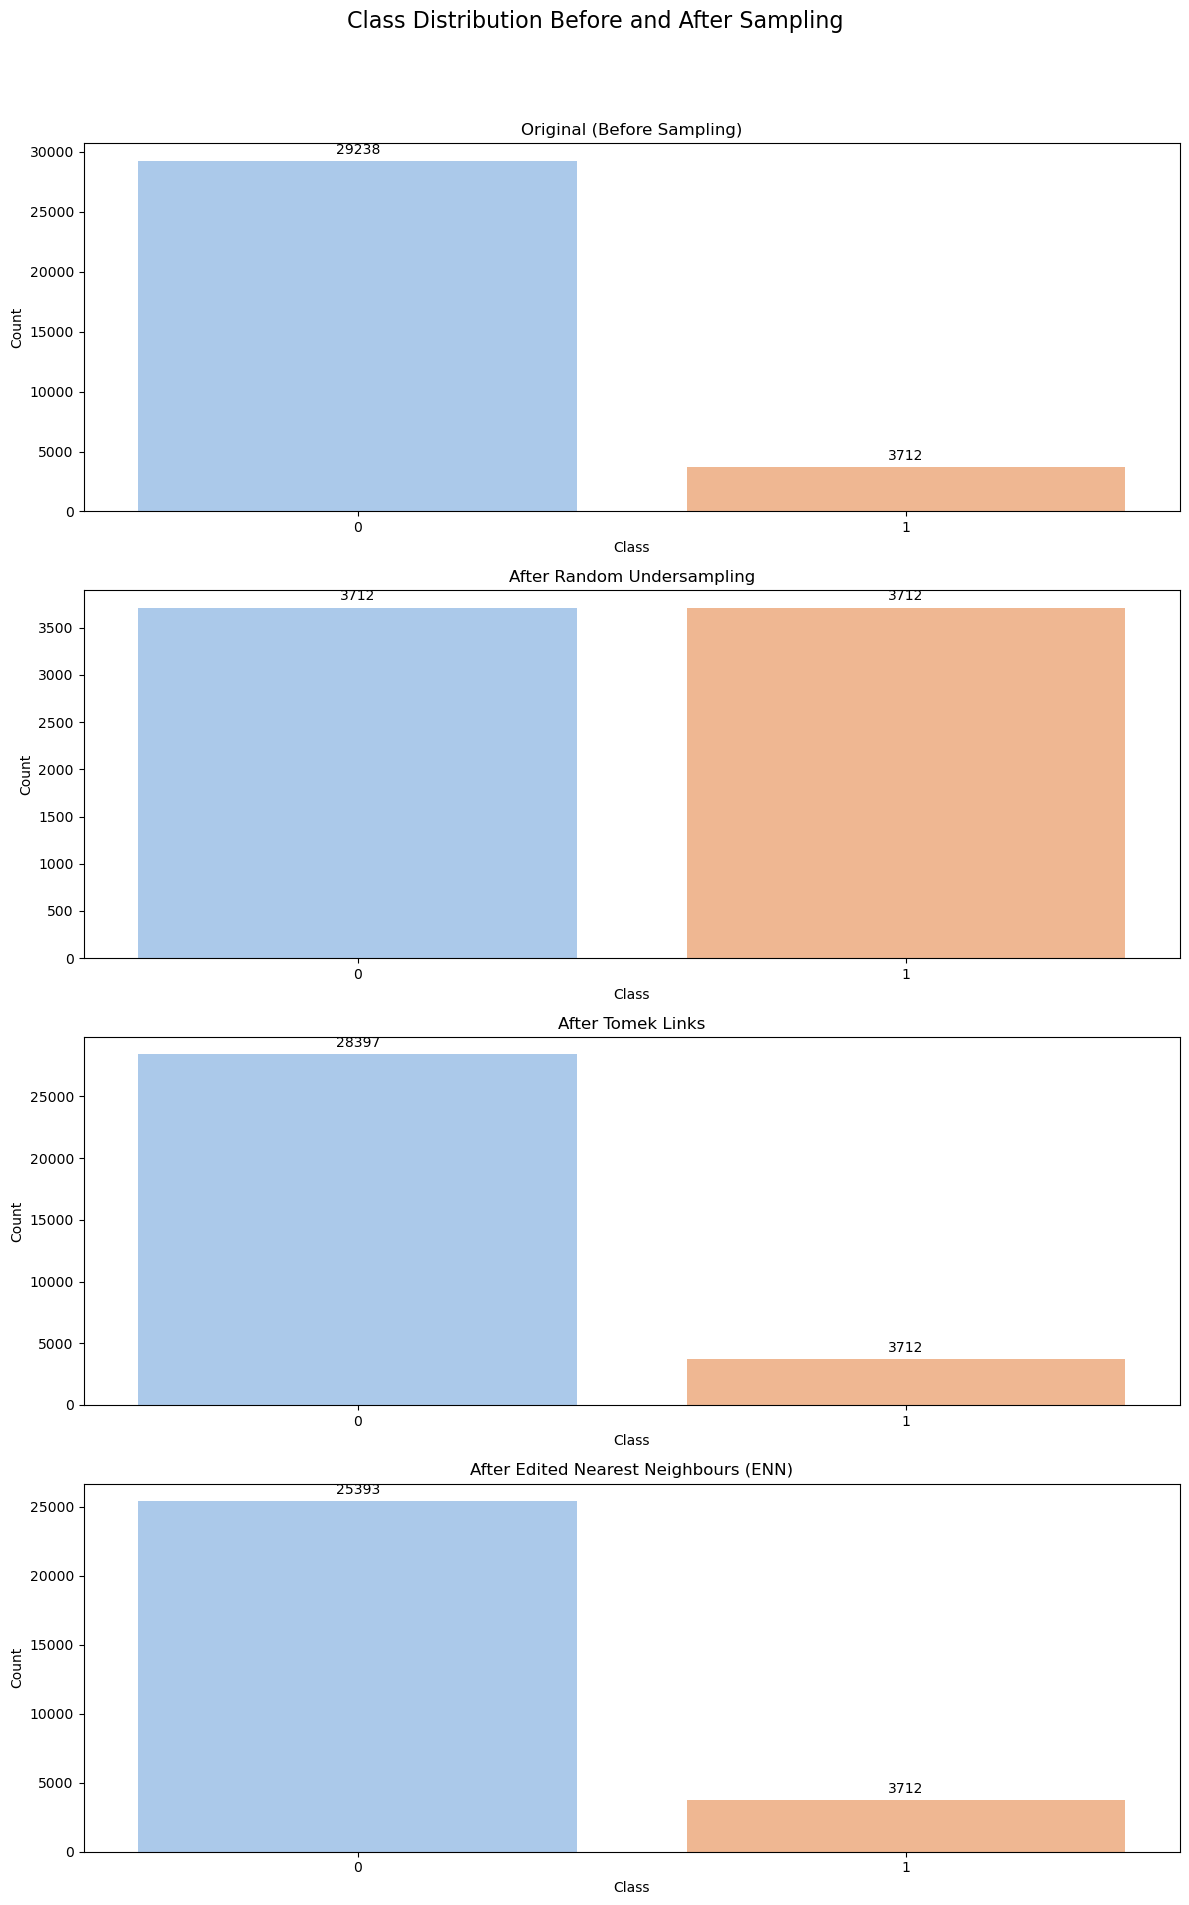

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Helper function to plot class distributions with value labels
def plot_class_distribution(y_data, title, ax):
    count_plot = sns.countplot(x=y_data, palette="pastel", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    
    # Add count labels above bars
    for container in count_plot.containers:
        count_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

# Create a figure with 4 rows and 1 column of subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
fig.suptitle("Class Distribution Before and After Sampling", fontsize=16)

# Plot original distribution
plot_class_distribution(y_train, "Original (Before Sampling)", axes[0])

# Plot Random Undersampling distribution
plot_class_distribution(y_train_rus, "After Random Undersampling", axes[1])

# Plot Tomek Links distribution
plot_class_distribution(y_train_tl, "After Tomek Links", axes[2])

# Plot Edited Nearest Neighbours (ENN) distribution
plot_class_distribution(y_train_enn, "After Edited Nearest Neighbours (ENN)", axes[3])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [79]:
# Training features after preprocessing
X_train = X_train_processed

# Testing features after preprocessing
X_test = X_test_processed

# Training features after Random Undersampling (RUS)
X_train_rus = X_train_rus

# Labels for training set after Random Undersampling (RUS)
y_train_rus = y_train_rus

# Training features after Tomek Links undersampling
X_train_tl = X_train_tl

# Labels for training set after Tomek Links
y_train_tl = y_train_tl

# Training features after Edited Nearest Neighbours (ENN)
X_train_enn = X_train_enn

# Labels for training set after Edited Nearest Neighbours (ENN)
y_train_enn = y_train_enn

# Original training labels
y_train = y_train


In [80]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [81]:
def test_model(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier()
    }

    # Store results
    results = {}

    for model_name, model in models.items():
        # Train Model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Store results in a dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'model': model
        }

        results = pd.DataFrame(results)

    return results

# Example of how to call the function
# results = test_model(X_train, X_test, y_train, y_test)
# print(results)

In [82]:
def test_model2(X_train, X_test, y_train, y_test):
    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(class_weight='balanced'),
        "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
    }

    # Store results
    results = {}

    for model_name, model in models.items():
        # Train Model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)

        # Calculate Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred) 
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)

        # Store results in a dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'model':model
        }

        results = pd.DataFrame(results)

    return results

# Example of how to call the function
# results = test_model(X_train, X_test, y_train, y_test)
# print(results)

In [83]:
baseline = test_model(X_train_processed, X_test_processed, y_train, y_test)
print("Baseline Models on Processed Data:")
baseline

Baseline Models on Processed Data:


,Logistic Regression,Decision Tree
accuracy,0.916242,0.89427
precision,0.709507,0.529534
recall,0.434267,0.550647
f1_score,0.53877,0.539884
auc,0.705848,0.74427
model,LogisticRegression(),DecisionTreeClassifier()


In [84]:
rus = test_model(X_train_rus, X_test_processed, y_train_rus, y_test)
print("Baseline Models on RUS Data:")
rus

Baseline Models on RUS Data:


,Logistic Regression,Decision Tree
accuracy,0.864773,0.843773
precision,0.450532,0.404369
recall,0.912716,0.817888
f1_score,0.603276,0.541176
auc,0.885701,0.832473
model,LogisticRegression(),DecisionTreeClassifier()


In [85]:
tomek = test_model(X_train_tl, X_test_processed, y_train_tl, y_test)
print("Baseline Models on Tomek Links Data:")
tomek


Baseline Models on Tomek Links Data:


,Logistic Regression,Decision Tree
accuracy,0.915635,0.890872
precision,0.673105,0.513929
recall,0.488147,0.576509
f1_score,0.565896,0.543423
auc,0.729025,0.753644
model,LogisticRegression(),DecisionTreeClassifier()


In [118]:
enn = test_model(X_train_enn, X_test_processed, y_train_enn, y_test)
print("ENN Models on ENN Data:")
enn


ENN Models on ENN Data:


,Logistic Regression,Decision Tree
accuracy,0.906895,0.893664
precision,0.564659,0.518705
recall,0.757543,0.77694
f1_score,0.647032,0.622088
auc,0.841699,0.842711
model,LogisticRegression(),DecisionTreeClassifier()


In [119]:
# Combine only RUS, ENN, and Tomek Links results into a single DataFrame
all_results = pd.concat([baseline, rus, enn, tomek], keys=['Baseline','RUS', 'ENN', 'Tomek Links'])

# Unpivot the DataFrame for better readability
all_results = all_results.stack().reset_index()

# Rename columns for clarity
all_results = all_results.rename(columns={
    'level_0': 'Sampling Method',
    'level_1': 'Metric',
    'level_2': 'Model',
    0: 'Value'
})

# Separate out model names for possible use and remove 'model' metric rows
models = all_results[all_results['Metric'] == 'model']
all_results = all_results[all_results['Metric'] != 'model']
all_results.reset_index(drop=True, inplace=True)

# Display the combined results
print("\nCombined Results for RUS, ENN, and Tomek Links:")
all_results


Combined Results for RUS, ENN, and Tomek Links:


,Sampling Method,Metric,Model,Value
0,Baseline,accuracy,Logistic Regression,0.916242
1,Baseline,accuracy,Decision Tree,0.89427
2,Baseline,precision,Logistic Regression,0.709507
3,Baseline,precision,Decision Tree,0.529534
4,Baseline,recall,Logistic Regression,0.434267
5,Baseline,recall,Decision Tree,0.550647
6,Baseline,f1_score,Logistic Regression,0.53877
7,Baseline,f1_score,Decision Tree,0.539884
8,Baseline,auc,Logistic Regression,0.705848
9,Baseline,auc,Decision Tree,0.74427


In [120]:
models

,Sampling Method,Metric,Model,Value
10,Baseline,model,Logistic Regression,LogisticRegression()
11,Baseline,model,Decision Tree,DecisionTreeClassifier()
22,RUS,model,Logistic Regression,LogisticRegression()
23,RUS,model,Decision Tree,DecisionTreeClassifier()
34,ENN,model,Logistic Regression,LogisticRegression()
35,ENN,model,Decision Tree,DecisionTreeClassifier()
46,Tomek Links,model,Logistic Regression,LogisticRegression()
47,Tomek Links,model,Decision Tree,DecisionTreeClassifier()


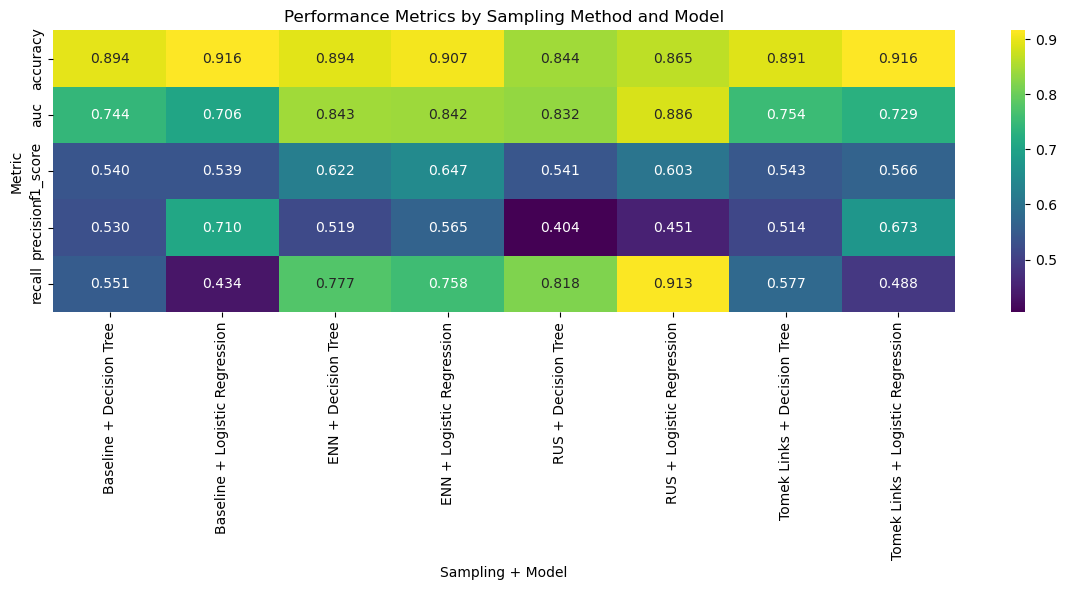

In [121]:
# Convert the Value column to numeric (coerce errors to NaN)
all_results['Value'] = pd.to_numeric(all_results['Value'], errors='coerce')

# Drop any rows where Value is NaN
all_results = all_results.dropna(subset=['Value'])

# Continue with your heatmap plotting code
all_results['Sampling+Model'] = all_results['Sampling Method'] + ' + ' + all_results['Model']
heatmap_data = all_results.pivot(index='Metric', columns='Sampling+Model', values='Value')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
plt.title("Performance Metrics by Sampling Method and Model")
plt.ylabel("Metric")
plt.xlabel("Sampling + Model")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Value column to numeric (coerce errors to NaN)
all_results['Value'] = pd.to_numeric(all_results['Value'], errors='coerce')

# Drop any rows where Value is NaN
all_results = all_results.dropna(subset=['Value'])

# Create a combined column for clarity in plotting
all_results['Sampling+Model'] = all_results['Sampling Method'] + ' + ' + all_results['Model']

# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=all_results, x='Sampling+Model', y='Value', hue='Metric')

# Add labels and title
plt.title("Performance Metrics by Sampling Method and Model")
plt.ylabel("Value")
plt.xlabel("Sampling + Model")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

NameError: name 'all_results' is not defined

# Implications

### 📝 **Introduction**

In direct marketing campaigns such as telebanking, contacting every customer can be costly and inefficient, especially when the conversion rate is low. Machine Learning (ML) offers a way to selectively contact customers who are most likely to respond positively. This simulation compares the financial implications of using an ML-based strategy versus a naive strategy (contacting all customers) by analyzing cost, profit, and net profit. We also explore how different precision and recall values—key performance metrics in ML classification—impact campaign profitability through F1-score trade-offs.

---

### 📊 **Simulation Setup**

| **Parameter**                    | **Value**             | **Description**                                            |
| -------------------------------- | --------------------- | ---------------------------------------------------------- |
| Total Customers                  | 100 and 100,000       | Two scenarios to represent small and large-scale campaigns |
| Naive Conversion Rate            | 5%                    | Assumed base success rate for contacting all customers     |
| ML Precision Range               | 0.1 to 0.9 (step 0.1) | Probability that predicted "yes" is truly "yes"            |
| ML Recall Range                  | 0.1 to 0.9 (step 0.1) | Proportion of actual "yes" that the model captures         |
| Contact Cost per Customer        | RM1                    | Cost incurred for each contact attempt                     |
| Profit per Successful Conversion | RM25                   | Estimated bank profit from a successful term deposit       |
| Evaluation Metric                | F1-Score, Net Profit  | Trade-off analysis between model quality and business gain |



In [123]:
advertisement_cost = 1
conversion_rate = 0.05
profit_per_conversion = 25

In [124]:
# Best Selected Model
lr = LogisticRegression(class_weight='balanced', random_state=42)
# lr = LogisticRegression(random_state=42)
lr.fit(X_train_processed, y_train)
# lr.fit(X_train_smote, y_train_smote)

y_pred = lr.predict(X_test_processed)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

# Print the results
print("Logistic Regression on SMOTE Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

print("===========================")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression on SMOTE Data:
Accuracy: 0.8653
Precision: 0.4514
Recall: 0.9116
F1 Score: 0.6039
AUC: 0.8855
Confusion Matrix:
[[6282 1028]
 [  82  846]]


| Metric                | Formula                                            | Description                                                          |
| --------------------- | -------------------------------------------------- | -------------------------------------------------------------------- |
| **Contacted**         | `TP + FP`                                          | Total customers the model predicts as positive and are contacted.    |
| **Model Gain (RM)**    | `TP × average_purchase`                            | Revenue from correctly predicted conversions.                        |
| **Model Lost (RM)**    | `FN × average_purchase`                            | Potential revenue lost from missed actual positives (not contacted). |
| **Model Cost (RM)**    | `(TP + FP) × advertisement_cost`                   | Total cost of contacting customers.                                  |
| **Model Revenue (RM)** | `Model Gain (RM) − Model Cost (RM)`                  | Revenue after deducting contact cost.                                |
| **Model Value (RM)**   | `Model Gain (RM) − Model Cost (RM) − Model Lost (RM)` | Net business value considering both cost and missed opportunities.   |


In [125]:
# Step 1: Confusion Matrix Estimation
def calculate_new_confusion_matrix(precision, recall, purchase_rate, total_samples):
    total_positives = purchase_rate * total_samples
    new_TP = recall * total_positives
    new_FN = total_positives - new_TP
    new_FP = (new_TP / precision) - new_TP if precision > 0 else 0
    new_TN = total_samples - (new_TP + new_FP + new_FN)
    return np.round([[new_TN, new_FP], [new_FN, new_TP]]).astype(int)

# Step 2: Business Impact Evaluation
def evaluate_model_business_impact(conf_matrix, total_samples, strategy, advertisement_cost, average_purchase):
    TN, FP = conf_matrix[0]
    FN, TP = conf_matrix[1]
    contacted = TP + FP
    model_cost = advertisement_cost * contacted
    model_gain = average_purchase * TP
    model_lost = average_purchase * FN
    model_revenue = model_gain - model_cost
    model_value = model_gain - model_lost - model_cost

    return {
        "Strategy": strategy,
        "Total Customers": total_samples,
        "Contacted": contacted,
        "Model Gain (RM)": model_gain,
        "Model Lost (RM)": model_lost,
        "Model Cost (RM)": model_cost,
        "Model Revenue (RM)": model_revenue,
        "Model Value (RM)": model_value
    }

# Step 3: Naive Strategy
def simulate_naive_strategy(total_customers, conversion_rate, advertisement_cost, average_purchase):
    contacted = total_customers
    conversions = total_customers * conversion_rate
    gain = conversions * average_purchase
    cost = contacted * advertisement_cost
    revenue = gain - cost
    value = gain - cost

    return {
        "Strategy": "Naive",
        "Total Customers": total_customers,
        "Contacted": contacted,
        "Model Gain (RM)": gain,
        "Model Lost (RM)": 0,
        "Model Cost (RM)": cost,
        "Model Revenue (RM)": revenue,
        "Model Value (RM)": value
    }

# Step 4: Parameters
total_customers = 100000
conversion_rate = 0.05
advertisement_cost = 1
average_purchase = 25

# Example precisions and recalls from 8 models
model_metrics = []
combinations = [
    ("RUS", "Logistic Regression"),
    ("RUS", "Decision Tree"),
    ("ENN", "Logistic Regression"),
    ("ENN", "Decision Tree"),
    ("Tomek Links", "Logistic Regression"),
    ("Tomek Links", "Decision Tree"),
    ("Baseline", "Logistic Regression"),
    ("Baseline", "Decision Tree")
]

# Loop through each combo and extract recall (sensitivity) and auc
for sampling, model in combinations:
    recall = all_results[
        (all_results["Sampling Method"] == sampling) &
        (all_results["Model"] == model) &
        (all_results["Metric"] == "recall")
    ]["Value"].values[0]

    auc = all_results[
        (all_results["Sampling Method"] == sampling) &
        (all_results["Model"] == model) &
        (all_results["Metric"] == "auc")
    ]["Value"].values[0]

    label = f"{sampling} - {model.split()[0]}"
    model_metrics.append((label, recall, auc))

# Collect results
results = []

# Add ML model results
for name, precision, recall in model_metrics:
    conf_matrix = calculate_new_confusion_matrix(precision, recall, conversion_rate, total_customers)
    model_result = evaluate_model_business_impact(conf_matrix, total_customers, name, advertisement_cost, average_purchase)
    results.append(model_result)

# Add Naive result
naive_result = simulate_naive_strategy(total_customers, conversion_rate, advertisement_cost, average_purchase)
results.append(naive_result)

# Step 5: Display in DataFrame
comparison_df = pd.DataFrame(results)
display(comparison_df)


,Strategy,Total Customers,Contacted,Model Gain (RM),Model Lost (RM),Model Cost (RM),Model Revenue (RM),Model Value (RM)
0,RUS - Logistic,100000,4853,110725.0,14275,4853,105872.0,91597.0
1,RUS - Decision,100000,5089,104050.0,20950,5089,98961.0,78011.0
2,ENN - Logistic,100000,5555,105200.0,19800,5555,99645.0,79845.0
3,ENN - Decision,100000,5424,105350.0,19650,5424,99926.0,80276.0
4,Tomek Links - Logistic,100000,7467,91125.0,33875,7467,83658.0,49783.0
5,Tomek Links - Decision,100000,6536,94200.0,30800,6536,87664.0,56864.0
6,Baseline - Logistic,100000,8127,88225.0,36775,8127,80098.0,43323.0
7,Baseline - Decision,100000,6758,93025.0,31975,6758,86267.0,54292.0
8,Naive,100000,100000,125000.0,0,100000,25000.0,25000.0


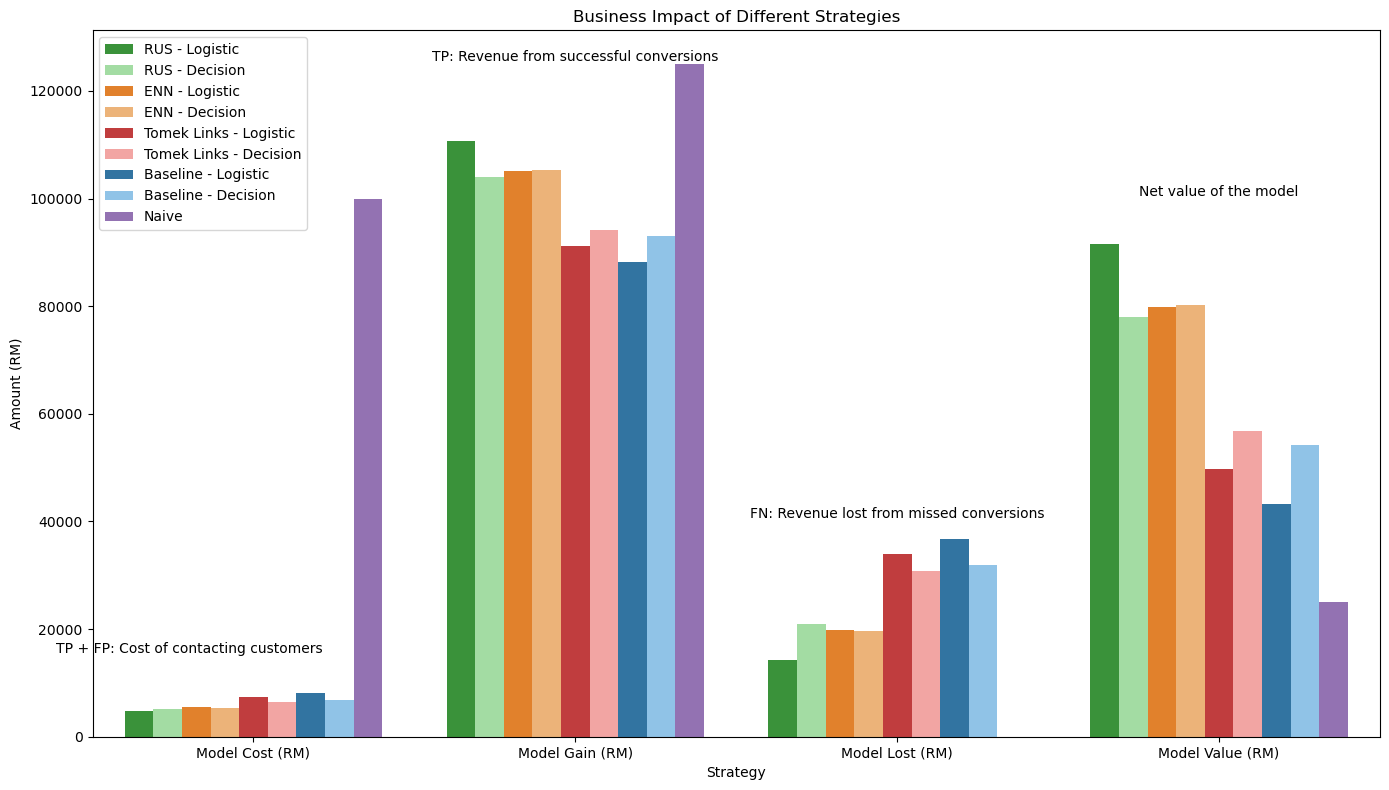

In [126]:
unpivoted_comparison_df = comparison_df.melt(id_vars=['Strategy', 'Total Customers', 'Contacted'],
                                              value_vars=['Model Cost (RM)', 'Model Gain (RM)', 'Model Lost (RM)', 'Model Value (RM)'],
                                              var_name='Metric', value_name='Amount (RM)')

# Colour mapping for the bar plot
colour_mapping = {
    "Baseline - Logistic": '#1f77b4',       # Blue
    "Baseline - Decision": "#82c5f5",       # Light Blue
    "ENN - Logistic": '#ff7f0e',            # Orange
    "ENN - Decision": "#ffb366",            # Light Orange
    "RUS - Logistic": '#2ca02c',            # Green
    "RUS - Decision": "#99e699",            # Light Green
    "Tomek Links - Logistic": "#d62728",    # Red
    "Tomek Links - Decision": "#ff9896",    # Light Red
    "Naive": "#9467bd"                      # Purple
}

# Plot Strategy grouped by Model Cost, Model Gain, Model Lost and Model Value
plt.figure(figsize=(14, 8))
sns.barplot(data=unpivoted_comparison_df, x='Metric', y='Amount (RM)', hue='Strategy', palette=colour_mapping)
plt.title('Business Impact of Different Strategies')

# Text to indicate the relating confusion matrix metrics
plt.text(-0.2, 15000, 'TP + FP: Cost of contacting customers',ha='center', va='bottom')
plt.text(1, 125000, 'TP: Revenue from successful conversions',ha='center', va='bottom')
plt.text(2, 40000, 'FN: Revenue lost from missed conversions',ha='center', va='bottom')
plt.text(3, 100000, 'Net value of the model',ha='center', va='bottom')

plt.ylabel('Amount (RM)')
plt.xlabel('Strategy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Deep Learning

In [96]:
import tensorflow as tf
print(tf.__version__)  # Should be 2.18.1

Sequential = tf.keras.models.Sequential
Dense = tf.keras.layers.Dense
Dropout = tf.keras.layers.Dropout
BinaryCrossentropy = tf.keras.losses.BinaryCrossentropy
AUC = tf.keras.metrics.AUC
Precision = tf.keras.metrics.Precision
Recall = tf.keras.metrics.Recall
EarlyStopping = tf.keras.callbacks.EarlyStopping



2.18.1


In [97]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get unique class labels from y_train
classes = np.unique(y_train)

# Compute weights inversely proportional to class frequencies
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y_train)

# Convert to dictionary format
class_weight = dict(zip(classes, weights))
print("Class weights:", class_weight)


Class weights: {0: 0.5634790341336616, 1: 4.438308189655173}


🧠 Purpose of `compute_class_weight`

It helps **automatically adjust for class imbalance** by assigning **higher weights to the minority class** and **lower weights to the majority class** when training models.

This helps the model **not be biased toward the majority class**.

---

⚙️ How It Works (Mechanism)

```python
weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
```

When you set `class_weight='balanced'`, it calculates class weights as:

$$
\text{Weight}_c = \frac{n_{\text{samples}}}{n_{\text{classes}} \times n_c}
$$

Where:

* $n_{\text{samples}}$: Total number of samples
* $n_{\text{classes}}$: Total number of unique classes (usually 2 in binary)
* $n_c$: Number of samples in class `c`

---

✅ Example:

Suppose your labels are:

```
y_train = [0, 0, 0, 0, 1, 1]
```

* Total samples = 6
* Classes = \[0, 1]
* Samples of class 0 = 4
* Samples of class 1 = 2

Then the weights would be:

$$
\text{Weight}_0 = \frac{6}{2 \times 4} = 0.75 \\
\text{Weight}_1 = \frac{6}{2 \times 2} = 1.5
$$

So the `class_weight` would be:

```python
{0: 0.75, 1: 1.5}
```

Now when the model trains, **errors made on class 1 (minority)** will be **penalized more heavily**, pushing the model to treat both classes more equally.

---

🛠️ Summary

* `compute_class_weight` balances the contribution of each class during training.
* It’s ideal for **imbalanced datasets**.
* Use it to avoid your model **defaulting to predicting the majority class**.



In [98]:
X_train_processed = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())
X_test_processed = pd.DataFrame(X_test_processed, columns=preprocessor.get_feature_names_out())

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [99]:
# Define the neural network
model = Sequential([
    Dense(14, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),  # Increased dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),  # Call the focal_loss function to get the actual loss function
              metrics=[Precision(), Recall(), AUC()])

# Add EarlyStopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_test_processed, y_test),
                    epochs=100,
                    batch_size=32,
                    class_weight=class_weight,  # Give higher weight to the positive class
                    callbacks=[early_stop])

Epoch 1/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - auc: 0.7955 - loss: 0.5334 - precision: 0.2392 - recall: 0.7296 - val_auc: 0.9378 - val_loss: 0.3292 - val_precision: 0.3974 - val_recall: 0.9407
Epoch 2/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - auc: 0.9147 - loss: 0.3673 - precision: 0.3691 - recall: 0.9000 - val_auc: 0.9415 - val_loss: 0.2883 - val_precision: 0.3896 - val_recall: 0.9483
Epoch 3/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - auc: 0.9194 - loss: 0.3476 - precision: 0.3627 - recall: 0.9155 - val_auc: 0.9422 - val_loss: 0.2792 - val_precision: 0.3979 - val_recall: 0.9450
Epoch 4/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - auc: 0.9283 - loss: 0.3278 - precision: 0.3870 - recall: 0.9322 - val_auc: 0.9427 - val_loss: 0.2893 - val_precision: 0.3813 - val_recall: 0.9558
Epoch 5/100
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - auc: 0.9285 - loss: 0.3233 - precision: 0.3747 - recall: 0.9312 - val_auc: 0.9442 - val_loss: 0.2924 - val_precision: 0.3868 - val

KeyboardInterrupt: 

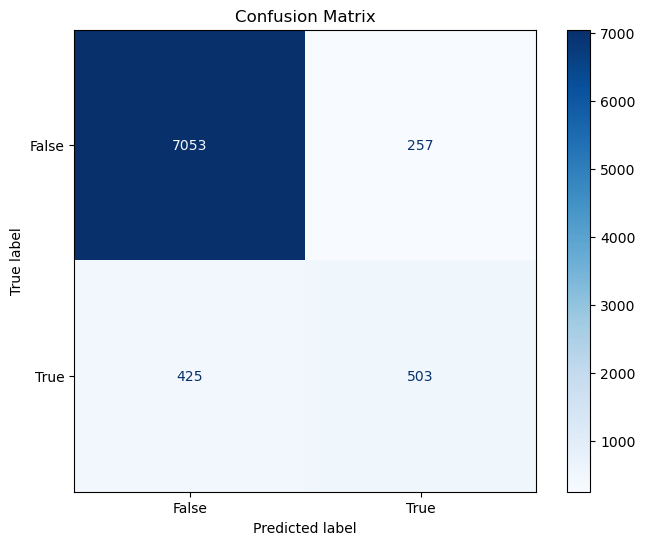

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["False", "True"])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
disp.plot(ax=ax, cmap='Blues', colorbar=True)

plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")


# get model metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Calculate new confusion matrix based on the model's predictions
new_conf_matrix = calculate_new_confusion_matrix(precision, recall, conversion_rate, total_customers)

# Evaluate the model's business impact
model_business_impact = evaluate_model_business_impact(new_conf_matrix, total_customers, "Neural Network", advertisement_cost, average_purchase)

# Display the model's business impact
model_business_impact_df = pd.DataFrame([model_business_impact])


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step


In [ ]:
# Combine with previous results
comparison_df = pd.concat([comparison_df, model_business_impact_df], ignore_index=True)

comparison_df

,Strategy,Total Customers,Contacted,Model Gain (RM),Model Lost (RM),Model Cost (RM),Model Revenue (RM),Model Value (RM)
0,Baseline - LR,100000,3060,54275.0,70725,3060,51215.0,-19510.0
1,Baseline - DT,100000,5080,67475.0,57525,5080,62395.0,4870.0
2,SMOTE - LR,100000,9849,113825.0,11175,9849,103976.0,92801.0
3,SMOTE - DT,100000,5695,71650.0,53350,5695,65955.0,12605.0
4,RUS - LR,100000,10130,114100.0,10900,10130,103970.0,93070.0
5,RUS - DT,100000,10194,102650.0,22350,10194,92456.0,70106.0
6,CWA - LR,100000,10097,113950.0,11050,10097,103853.0,92803.0
7,CWA - DT,100000,4742,67625.0,57375,4742,62883.0,5508.0
8,Naive,100000,100000,125000.0,0,100000,25000.0,25000.0
9,Neural Network,100000,11606,118275.0,6725,11606,106669.0,99944.0


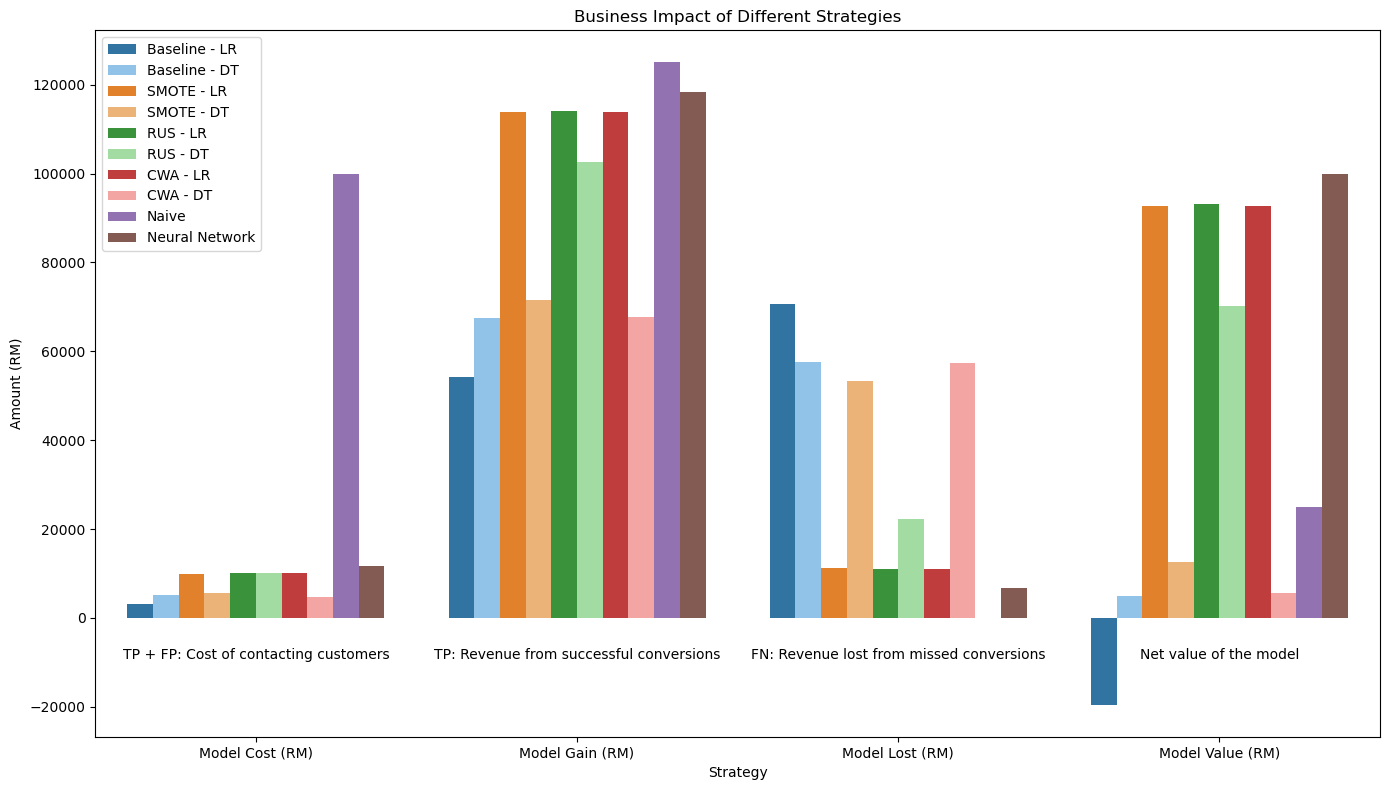

In [ ]:
unpivoted_comparison_df = comparison_df.melt(id_vars=['Strategy', 'Total Customers', 'Contacted'],
                                              value_vars=['Model Cost (RM)', 'Model Gain (RM)', 'Model Lost (RM)', 'Model Value (RM)'],
                                              var_name='Metric', value_name='Amount (RM)')

# Colour mapping for the bar plot
colour_mapping = {
    "Baseline - LR": '#1f77b4',  # Blue
    "Baseline - DT": "#82c5f5", # Light Blue
    "SMOTE - LR": '#ff7f0e',  # Orange
    "SMOTE - DT": "#ffb366",  # Light Orange
    "RUS - LR": '#2ca02c',  # Green
    "RUS - DT": "#99e699",  # Light Green
    "CWA - LR": "#d62728",  # Red
    "CWA - DT": "#ff9896",   # Light Red
    "Naive": "#9467bd",  # Purple
    "Neural Network": "#8c564b"  # Brown
}
# Plot Strategy grouped by Model Cost, Model Gain, Model Lost and Model Value
plt.figure(figsize=(14, 8))
sns.barplot(data=unpivoted_comparison_df, x='Metric', y='Amount (RM)', hue='Strategy', palette=colour_mapping)
plt.title('Business Impact of Different Strategies')

# Text to indicate the relating confusion matrix metrics
plt.text(0, -10000, 'TP + FP: Cost of contacting customers',ha='center', va='bottom')
plt.text(1, -10000, 'TP: Revenue from successful conversions',ha='center', va='bottom')
plt.text(2, -10000, 'FN: Revenue lost from missed conversions',ha='center', va='bottom')
plt.text(3, -10000, 'Net value of the model',ha='center', va='bottom')

plt.ylabel('Amount (RM)')
plt.xlabel('Strategy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
